In [15]:
# Copied from https://huggingface.co/microsoft/Florence-2-large/blob/main/sample_inference.ipynb

from PIL import ImageDraw 
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']


def draw_polygons(image, prediction, fill_mask=False):  
    """  
    Draws segmentation masks with polygons on an image.  
  
    Parameters:  
    - image_path: Path to the image file.  
    - prediction: Dictionary containing 'polygons' and 'labels' keys.  
                  'polygons' is a list of lists, each containing vertices of a polygon.  
                  'labels' is a list of labels corresponding to each polygon.  
    - fill_mask: Boolean indicating whether to fill the polygons with color.  
    """  
    # Load the image  
   
    draw = ImageDraw.Draw(image)  
      
    # Set up scale factor if needed (use 1 if not scaling)  
    scale = 1  
      
    # Iterate over polygons and labels  
    for polygons, label in zip(prediction['polygons'], prediction['labels']):  
        color = random.choice(colormap)  
        fill_color = random.choice(colormap) if fill_mask else None  
          
        for _polygon in polygons:  
            _polygon = np.array(_polygon).reshape(-1, 2)  
            if len(_polygon) < 3:  
                print('Invalid polygon:', _polygon)  
                continue  
              
            _polygon = (_polygon * scale).reshape(-1).tolist()  
              
            # Draw the polygon  
            if fill_mask:  
                draw.polygon(_polygon, outline=color, fill=fill_color)  
            else:  
                draw.polygon(_polygon, outline=color)  
              
            # Draw the label text  
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)  
  
    # Save or display the image  
    #image.show()  # Display the image  
    display(image)

In [16]:
from lmmrotate.models import get_inferencer

model_name_or_path = 'Qingyun/Florence-2-large-DOTA-v1.0-lmmrotate'
device = 'cuda:0'
torch_dtype = 'fp16'  # 'fp16' for RTX4090, 'bf16' for A100

model = get_inferencer(model_name_or_path, device=device, torch_dtype=torch_dtype)

Model loaded from ../checkpoints/florence-2-l_vis1024-lang2048_dota1-v2_b2x4xga4-100e-zero2, with 772,271,104 parameters, including 360,632,320 for vision tower, 2,097,152 for multimodal projection, 409,437,184 for language model.


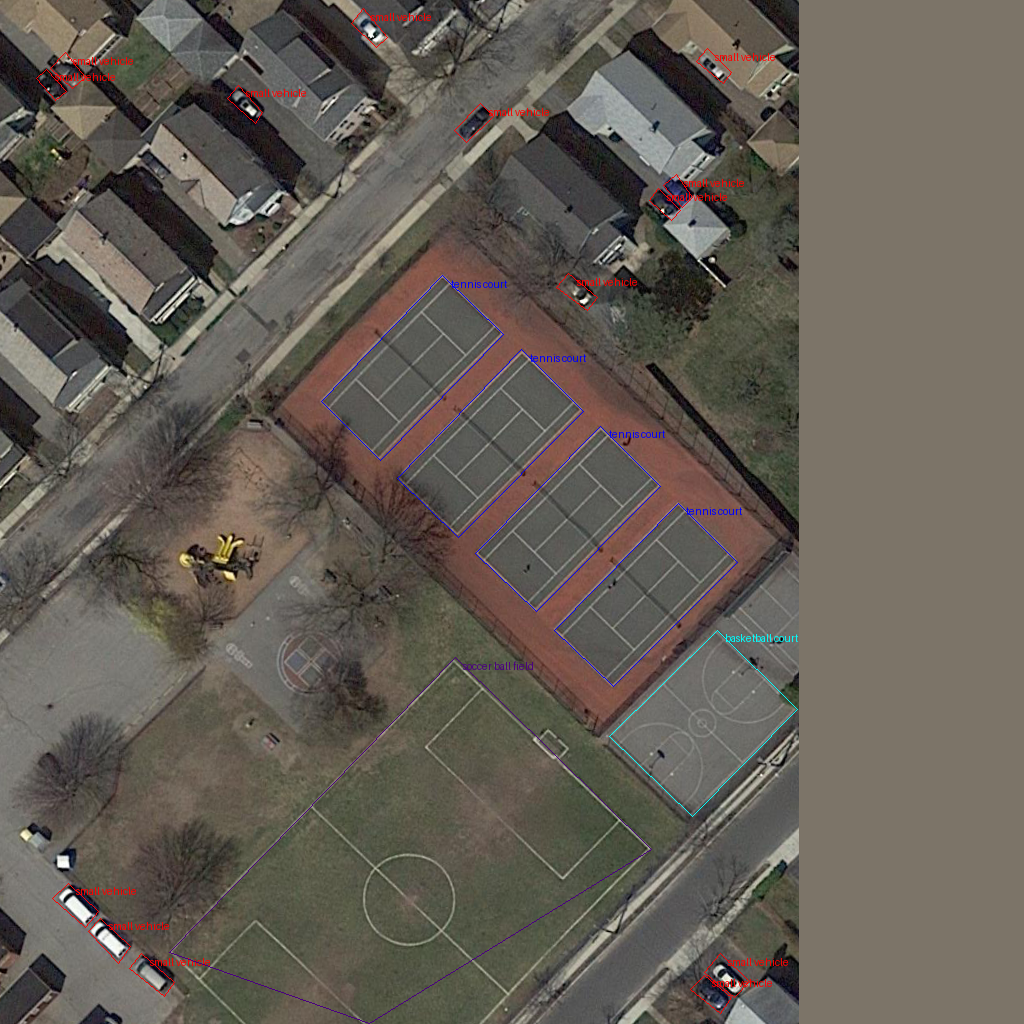

In [17]:
from PIL import Image

img_path = "P0368__1024__0___0.png"
image = Image.open(img_path)
parsed_answer = model(img_path)
pred_instances = draw_polygons(image, parsed_answer['<ROD>'])